# Creating BiLSTM to predict stock performance

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.data import Dataset
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional, LSTMCell, RNN, Input

2023-09-06 12:37:47.224537: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-06 12:37:47.335425: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-06 12:37:47.339107: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-06 12:37:54.318187: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Downloading the data and spitting on train and test

In [633]:
data = pd.read_csv("../raw_data/ABT.csv", index_col=0)
scaler = MinMaxScaler()
X =scaler.fit_transform(data[['close']])
x_train = X[:-100]
test = X[-100:-95]

## Identify and train the model

In [635]:
# split a univariate sequence
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
    # find the end of this pattern
        end_ix = i + n_steps
    # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
 # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)
 
# define input sequence
raw_seq = x_train
# choose a number of time steps
n_steps = 5
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
history = model.fit(X, y, epochs=200, verbose=0)
# demonstrate prediction
x_input = test
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[0.51871645]]


## Predict 25 steps on real data

In [641]:
pred1 = []
for i in range(0, 5):
    test = X[-95+i]
    x_input = test
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    pred1.append(yhat)

In [643]:
target_array = np.zeros((5, 1), dtype=np.float32)
for x, arr in enumerate(pred1):
    target_array[x, 0] = arr[0, 0]
test1=np.append(test, target_array, axis=0)

In [645]:
for i in range(0,5):
    test = X[-90+i]
    x_input = test
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    pred1.append(yhat)

In [646]:
target_array = np.zeros((5, 1), dtype=np.float32)
for x, arr in enumerate(pred1[-5:]):
    target_array[x, 0] = arr[0, 0]
test1=np.append(test1, target_array, axis=0)

In [647]:
for i in range(0,5):
    test = X[-85+i]
    x_input = test
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    pred1.append(yhat)

In [649]:
target_array = np.zeros((5, 1), dtype=np.float32)
for x, arr in enumerate(pred1[-5:]):
    target_array[x, 0] = arr[0, 0]
test1=np.append(test1, target_array, axis=0)

In [650]:
for i in range(0,5):
    test = X[-80+i]
    x_input = test
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    pred1.append(yhat)

In [651]:
target_array = np.zeros((5, 1), dtype=np.float32)
for x, arr in enumerate(pred1[-5:]):
    target_array[x, 0] = arr[0, 0]
test1=np.append(test1, target_array, axis=0)

## Continue prediction on predicted data using trend normalization

In [654]:
X_new, y_new = split_sequence(test1, n_steps)
slope = X[-75][4]/X[-100][0]

In [655]:
for i in range(0, 5):
    test = X_new[i]
    x_input = test
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    pred1.append(yhat*np.sqrt(slope[0]))

In [656]:
X_new, y_new = split_sequence(test1, n_steps)
slope = X[-70][4]/X[-95][0]

In [657]:
for i in range(0, 5):
    test = X_new[i]
    x_input = test
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    pred1.append(yhat*np.sqrt(slope[0]))

In [658]:
X_new, y_new = split_sequence(pred1[-25:], n_steps)
slope = X[-65][4]/X[-90][0]

In [659]:
for i in range(0, 5):
    test = X_new[i]
    x_input = test
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    pred1.append(yhat*np.sqrt(slope[0]))

In [660]:
X_new, y_new = split_sequence(pred1[-25:], n_steps)
slope = X[-60][4]/X[-85][0]

In [661]:
for i in range(0, 5):
    test = X_new[i]
    x_input = test
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    pred1.append(yhat*np.sqrt(slope[0]))

In [662]:
X_new, y_new = split_sequence(pred1[-25:], n_steps)
slope = X[-55][4]/X[-80][0]

In [663]:
for i in range(0, 5):
    test = X_new[i]
    x_input = test
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    pred1.append(yhat*np.sqrt(slope[0]))

In [664]:
X_new, y_new = split_sequence(pred1[-25:], n_steps)
slope = X[-50][4]/X[-75][0]

In [665]:
for i in range(0, 5):
    test = X_new[i]
    x_input = test
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    pred1.append(yhat*np.sqrt(slope[0]))

In [666]:
X_new, y_new = split_sequence(pred1[-25:], n_steps)
slope = X[-45][4]/X[-70][0]

In [667]:
for i in range(0, 5):
    test = X_new[i]
    x_input = test
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    pred1.append(yhat*np.sqrt(slope[0]))

In [668]:
X_new, y_new = split_sequence(pred1[-25:], n_steps)
slope = X[-40][4]/X[-65][0]

In [669]:
for i in range(0, 5):
    test = X_new[i]
    x_input = test
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    pred1.append(yhat*np.sqrt(slope[0]))

In [670]:
X_new, y_new = split_sequence(pred1[-25:], n_steps)
slope = X[-35][4]/X[-60][0]
for i in range(0, 5):
    test = X_new[i]
    x_input = test
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    pred1.append(yhat*np.sqrt(slope[0]))

In [671]:
X_new, y_new = split_sequence(pred1[-25:], n_steps)
slope = X[-30][4]/X[-55][0]
for i in range(0, 5):
    test = X_new[i]
    x_input = test
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    pred1.append(yhat*np.sqrt(slope[0]))

In [672]:
X_new, y_new = split_sequence(pred1[-25:], n_steps)
slope = X[-25][4]/X[-50][0]
for i in range(0, 5):
    test = X_new[i]
    x_input = test
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    pred1.append(yhat*np.sqrt(slope[0]))

In [673]:
X_new, y_new = split_sequence(pred1[-25:], n_steps)
slope = X[-20][4]/X[-45][0]
for i in range(0, 5):
    test = X_new[i]
    x_input = test
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    pred1.append(yhat*np.sqrt(slope[0]))

In [674]:
X_new, y_new = split_sequence(pred1[-25:], n_steps)
slope = X[-15][4]/X[-40][0]
for i in range(0, 5):
    test = X_new[i]
    x_input = test
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    pred1.append(yhat*np.sqrt(slope[0]))

In [675]:
X_new, y_new = split_sequence(pred1[-25:], n_steps)
slope = X[-10][4]/X[-35][0]
for i in range(0, 5):
    test = X_new[i]
    x_input = test
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    pred1.append(yhat*np.sqrt(slope[0]))

In [676]:
X_new, y_new = split_sequence(pred1[-25:], n_steps)
slope = X[-5][4]/X[-30][0]
for i in range(0, 5):
    test = X_new[i]
    x_input = test
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    pred1.append(yhat*np.sqrt(slope[0]))

## Creating actual and predicted prices' lines

In [677]:
pred_price = [scaler.inverse_transform(i)[0][0] for i in pred1]

In [678]:
real = [scaler.inverse_transform(i)[4][0] for i in X[-95:-1]]

## Plotting the results

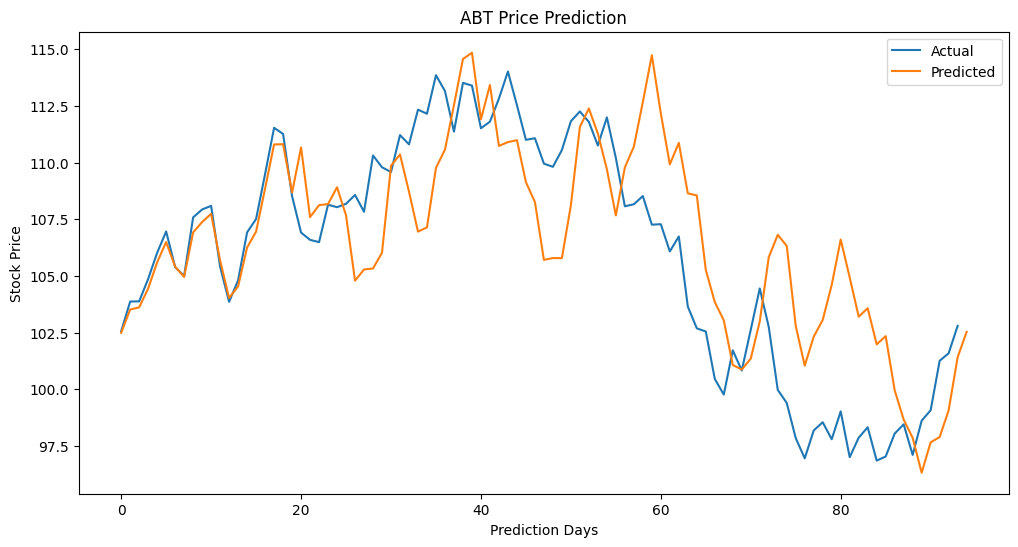

In [679]:
plt.figure(figsize=(12, 6))
plt.plot(real, label='Actual')
plt.plot(pred_price, label='Predicted')
plt.legend()
plt.xlabel('Prediction Days')
plt.ylabel('Stock Price')
plt.title('ABT Price Prediction')
#plt.savefig('../CAT_price_prediction.png')
plt.show()